In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N=100, config_num=6)

In [3]:
downsampled_imgs = O.Features.get_features(imgs, 'sift', 'minmax')

In [4]:
config_settings = {
    'contamination': 0.13,
    'verbose': False,
    'norm_type': 'minmax',
    'metric': 'euclidean',
    'n_jobs': 1,
    'n_bins': 2,
    'alpha': 0.2,
    'n_clusters': 2,
    'tol': 0.2,
    'beta': 3,
    'n_neighbors': 3,
    'base_estimators': ['LOF', 'INNE', 'CBLOF', 'FB'],
    'cluster_estimator': 'KMeans',
    'n_estimators': 6,
    'subset_size': 0.5,
    'combination': 'maximum',
    'leaf_size': 50,
    'p': 3,
    'novelty': False,
    'kernel': 'rbf',
    'degree': 2,
    'gamma': 0.1,
    'coef0': 1,
    'nu': 0.5,
    'shrinking': True,
    'cache_size': 50,
    'max_iter': -1,
    'max_samples': 0.5,
    'bandwidth': 1.0,
    'radius': 1.0,
    'hidden_neurons': [24, 12, 12, 24]
}

In [5]:
train_scores, train_labels, accuracy = O.OutlierDetector.detect_outliers(
    features=downsampled_imgs,
    imgs=imgs,
    pyod_algorithm='LOF',
    accuracy_score=True,
    number_bad=13,
    **config_settings)

Running LOF... len of imgs and t_scores are equal for LOF
LOF accuracy: 0.6923076923076923


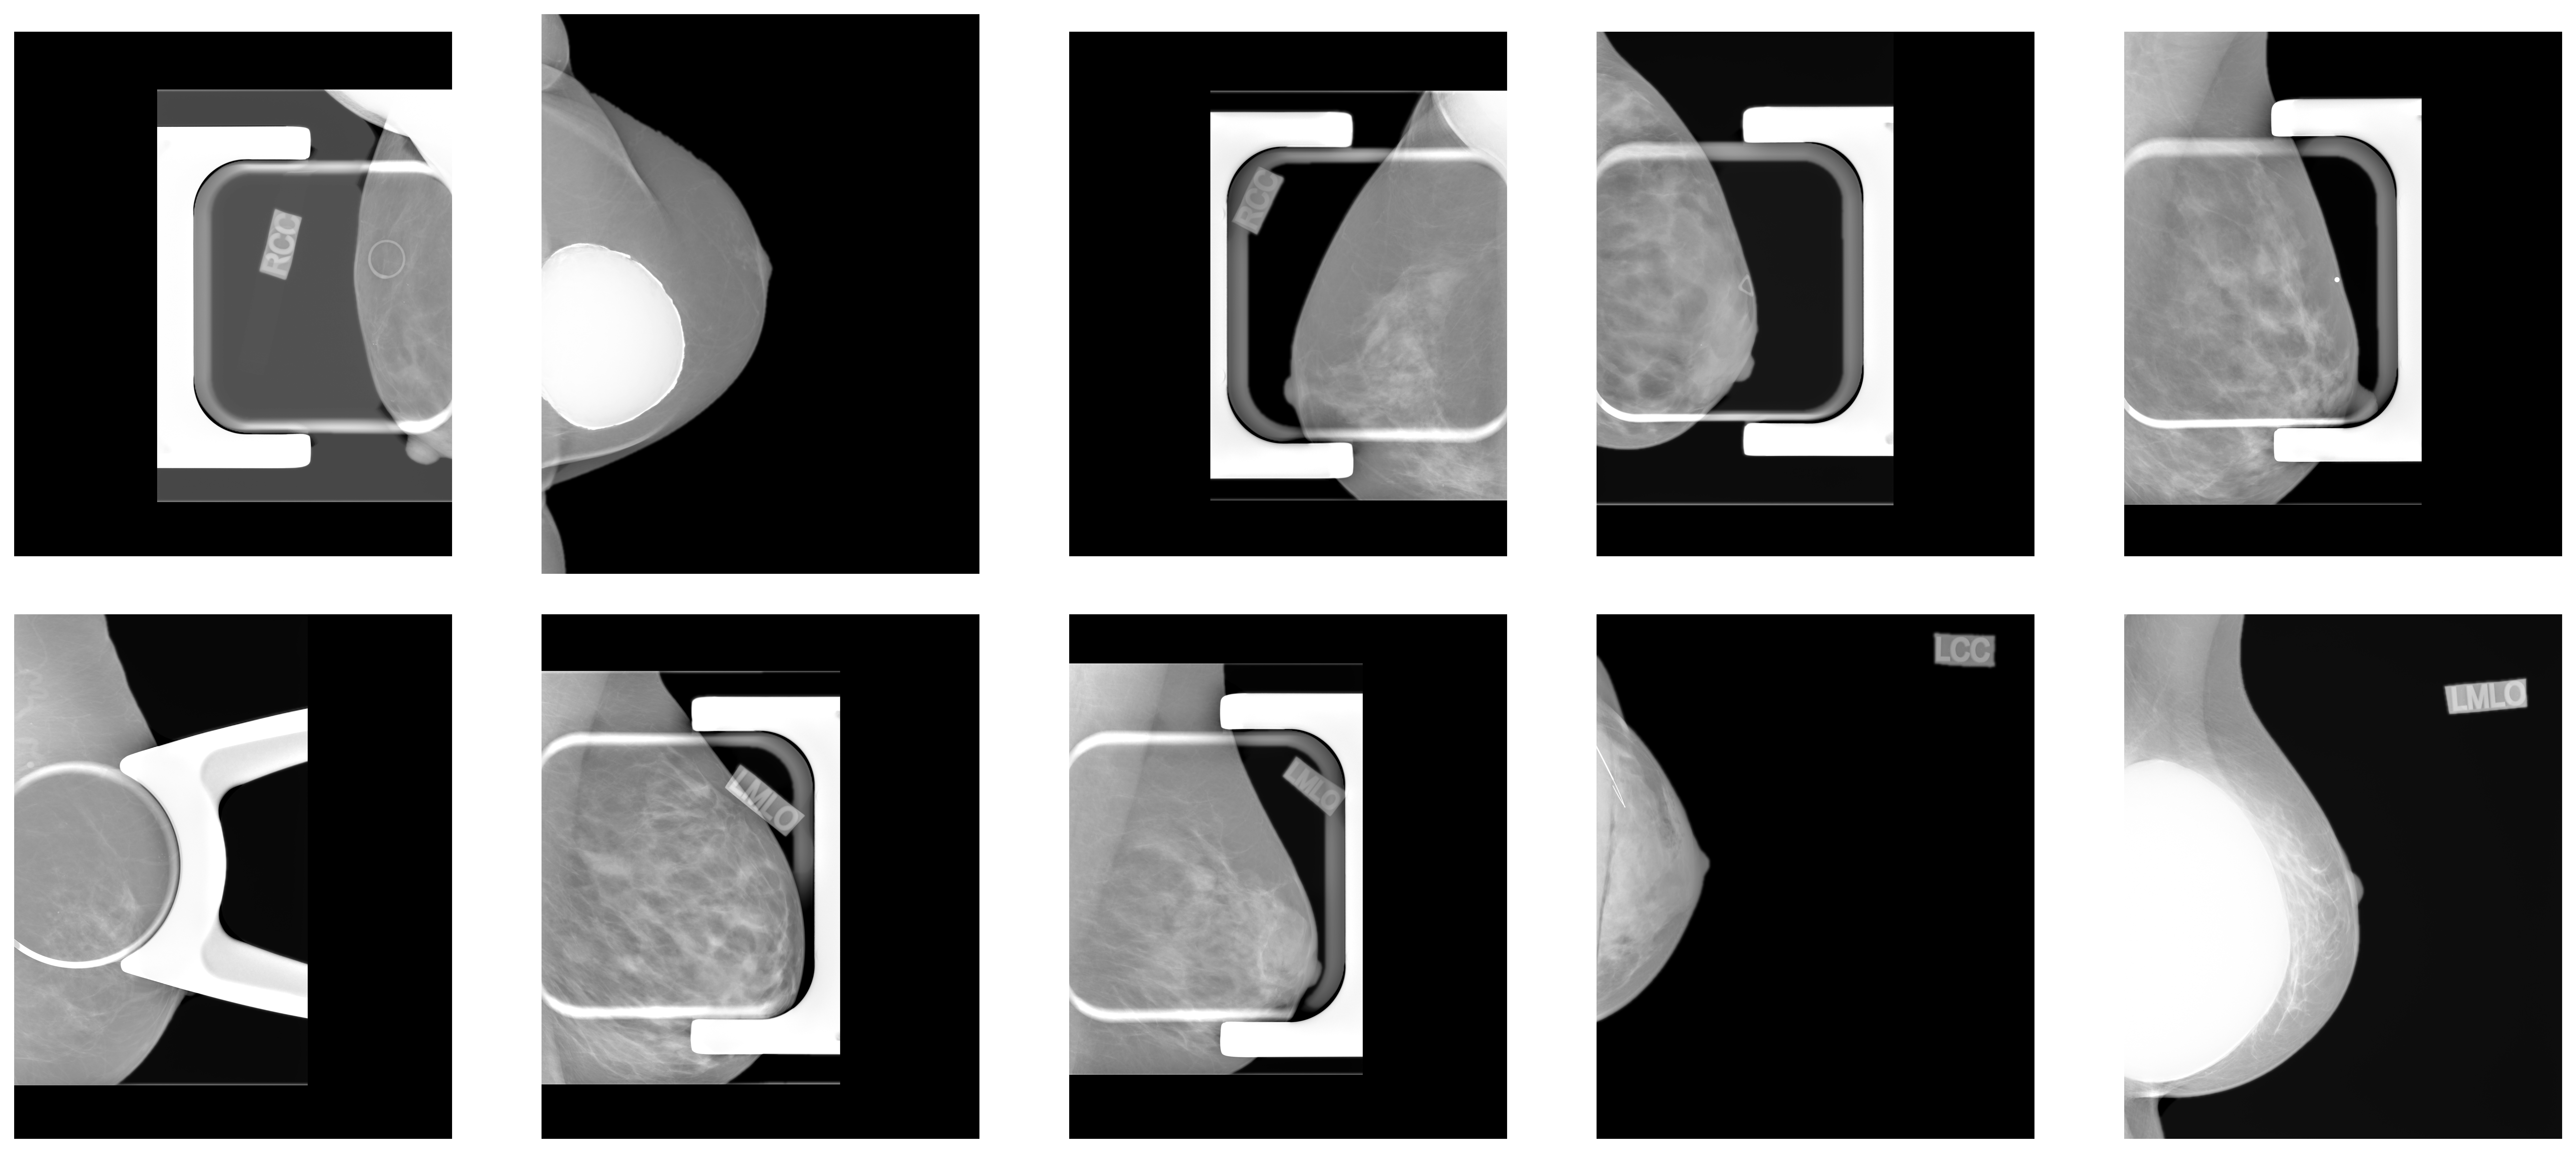

In [6]:
img_list = O.ImageList(imgs, [train_scores])
img_list.display_image_grid(N=10)